##KREIRANJE GRAF

In [ ]:
!pip install ogb
import torch

!pip uninstall torch-scatter torch-sparse torch-geometric torch-cluster  --y
!pip install torch-scatter -f https://data.pyg.org/whl/torch-{torch.__version__}.html
!pip install torch-sparse -f https://data.pyg.org/whl/torch-{torch.__version__}.html
!pip install torch-cluster -f https://data.pyg.org/whl/torch-{torch.__version__}.html
!pip install git+https://github.com/pyg-team/pytorch_geometric.git


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.8/78.8 kB 1.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for littleutils: filename=littleutils-0.2.2-py3-none-any.whl size=7028 sha256=14383f89be7d1aa585308539e420867dce825665de44ca12af15804086fdfa8d
  Stored in directory: /root/.cache/pip/wheels/3d/fe/b0/27a9892da57472e538c7452a721a9cf463cc03cf7379889266
Successfully built littleutils
Looking in links: https://data.pyg.org/whl/torch-2.0.1+cu118.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 69.6 MB/s eta 0:00:00
Looking in links: https://data.pyg.org/whl/torch-2.0.1+cu118.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 53.0 MB/s eta 0:00:00
Looking in links: https://data.pyg.org/whl/torch-2.0.1+cu118.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 42.0 MB/s eta 0:00:00
  Cloning https://github.com/pyg-team/pytorch_geometric.git to /tmp/pip-req-build-emo_1ce8
  Running command git clone --filter=blob:none --quiet

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
links = pd.read_csv("/content/drive/MyDrive/Proekt/test_sample.csv")
desc = pd.read_csv("/content/drive/MyDrive/Proekt/test_sample_desc.csv")

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Initialize the label encoder
label_encoder = LabelEncoder()

# Label encode the "industry" column in the DataFrame
desc['industry'] = label_encoder.fit_transform(desc['industry'])


In [ ]:
dic = {}
for row in links.values:
    home_name = row[0]
    link_name = row[1]

    if home_name not in dic:
        dic[home_name] = []
    dic[home_name].append(link_name)

In [ ]:
dic

{'Accenture': ['Tribune', 'Intertek'],
 'TQS': ['Canadian Broadcasting'],
 'Standard Chartered': ['IBM'],
 'Splunk': ['Ensighten', 'KKR', 'Risk Focus', 'Flexion-IS'],
 'SAS': ['SOPRA GROUP DIRECTION GENERALE',
  'Tabulaex Srl',
  'Kappa Egitim Danismanlik Ve Arastirma Ltd STI',
  'China Consultants of Advisory & Financial Management Co Ltd',
  'iDimension MSC Sdn Bhd',
  'Almaviva SpA',
  'Instituto de Fomento Sanitario',
  'Fors Energy LLC'],
 'Connotate': ['SJV'],
 'Palo Alto Networks': ['Landkreis Grafschaft Bentheim'],
 'CIBC': ['Sonic Wall'],
 'Crane &': ['DHL'],
 'The Blackstone Group LP': ['Crocs'],
 'F5 Networks': ['Chrysler'],
 'Honda': ['Suzuki'],
 'Northern Trust': ['Solstice'],
 'Ixia': ['AMD', 'AMD', 'Extreme Networks'],
 'Microsoft': ['Sophos',
  'OmniVue',
  'Yoplait',
  'Universal Studios',
  'Jeep',
  'NCR',
  'Lexmark',
  'trueITpros, LLC',
  'Ascentis',
  'Blue Stone Backup',
  'Tyler Technologies',
  'Abshier Enterprises, Inc.',
  'Telog Instruments',
  'EDF',
  'Da

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.Graph()
for home_name in dic.keys():
    G.add_node(home_name, name = home_name)
    for link_name in dic[home_name]:
        edge_labels = 'nan'
        G.add_node(link_name, name = link_name )
        filtered_links = links[(links['home_name'] == home_name) & (links['link_name'] == link_name)]
        if not filtered_links.empty:
          edge_labels = filtered_links['type'].values[0]
        G.add_edge(home_name, link_name, label=edge_labels)


In [ ]:
print("Number of nodes", G.number_of_nodes())
print("Number of edges", G.number_of_edges())

Number of nodes 2395
Number of edges 1992


In [ ]:
G.nodes

NodeView(('Accenture', 'Tribune', 'Intertek', 'TQS', 'Canadian Broadcasting', 'Standard Chartered', 'IBM', 'Splunk', 'Ensighten', 'KKR', 'Risk Focus', 'Flexion-IS', 'SAS', 'SOPRA GROUP DIRECTION GENERALE', 'Tabulaex Srl', 'Kappa Egitim Danismanlik Ve Arastirma Ltd STI', 'China Consultants of Advisory & Financial Management Co Ltd', 'iDimension MSC Sdn Bhd', 'Almaviva SpA', 'Instituto de Fomento Sanitario', 'Fors Energy LLC', 'Connotate', 'SJV', 'Palo Alto Networks', 'Landkreis Grafschaft Bentheim', 'CIBC', 'Sonic Wall', 'Crane &', 'DHL', 'The Blackstone Group LP', 'Crocs', 'F5 Networks', 'Chrysler', 'Honda', 'Suzuki', 'Northern Trust', 'Solstice', 'Ixia', 'AMD', 'Extreme Networks', 'Microsoft', 'Sophos', 'OmniVue', 'Yoplait', 'Universal Studios', 'Jeep', 'NCR', 'Lexmark', 'trueITpros, LLC', 'Ascentis', 'Blue Stone Backup', 'Tyler Technologies', 'Abshier Enterprises, Inc.', 'Telog Instruments', 'EDF', 'Data2save', 'Forum Info-Tech, Inc.', 'R2AD', 'ADP', 'PKF', 'Tribridge', 'Hewlett-Pack

In [ ]:
node_dict = {}
next_index = 0

for node in G.nodes:
    if node not in node_dict:
        node_dict[node] = next_index
        next_index += 1

In [ ]:
print(node_dict)

{'Accenture': 0, 'Tribune': 1, 'Intertek': 2, 'TQS': 3, 'Canadian Broadcasting': 4, 'Standard Chartered': 5, 'IBM': 6, 'Splunk': 7, 'Ensighten': 8, 'KKR': 9, 'Risk Focus': 10, 'Flexion-IS': 11, 'SAS': 12, 'SOPRA GROUP DIRECTION GENERALE': 13, 'Tabulaex Srl': 14, 'Kappa Egitim Danismanlik Ve Arastirma Ltd STI': 15, 'China Consultants of Advisory & Financial Management Co Ltd': 16, 'iDimension MSC Sdn Bhd': 17, 'Almaviva SpA': 18, 'Instituto de Fomento Sanitario': 19, 'Fors Energy LLC': 20, 'Connotate': 21, 'SJV': 22, 'Palo Alto Networks': 23, 'Landkreis Grafschaft Bentheim': 24, 'CIBC': 25, 'Sonic Wall': 26, 'Crane &': 27, 'DHL': 28, 'The Blackstone Group LP': 29, 'Crocs': 30, 'F5 Networks': 31, 'Chrysler': 32, 'Honda': 33, 'Suzuki': 34, 'Northern Trust': 35, 'Solstice': 36, 'Ixia': 37, 'AMD': 38, 'Extreme Networks': 39, 'Microsoft': 40, 'Sophos': 41, 'OmniVue': 42, 'Yoplait': 43, 'Universal Studios': 44, 'Jeep': 45, 'NCR': 46, 'Lexmark': 47, 'trueITpros, LLC': 48, 'Ascentis': 49, 'Blue

In [ ]:
for node, index in node_dict.items():
    G = nx.relabel_nodes(G, {node: index})

In [ ]:
G.nodes

NodeView((0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 

In [ ]:
import networkx as nx

for u, v in G.edges():
    edge_data = G.get_edge_data(u, v)
    if edge_data is not None and 'label' in edge_data:
        edge_label = edge_data['label']
        print(f"Edge ({u}, {v}) has label: {edge_label}")
    else:
        print(f"Edge ({u}, {v}) has no label")


Edge (0, 1) has label: investment
Edge (0, 2) has label: customer
Edge (0, 367) has label: customer
Edge (0, 547) has label: partnership
Edge (0, 824) has label: partnership
Edge (3, 4) has label: investment
Edge (5, 6) has label: supplier
Edge (5, 416) has label: investment
Edge (6, 380) has label: customer
Edge (6, 381) has label: supplier
Edge (6, 382) has label: investment
Edge (6, 383) has label: investment
Edge (6, 384) has label: customer
Edge (6, 385) has label: customer
Edge (6, 386) has label: supplier
Edge (6, 387) has label: customer
Edge (6, 388) has label: investment
Edge (6, 389) has label: partnership
Edge (6, 390) has label: customer
Edge (6, 391) has label: investment
Edge (6, 392) has label: partnership
Edge (6, 393) has label: partnership
Edge (6, 394) has label: customer
Edge (6, 395) has label: competitor
Edge (6, 396) has label: investment
Edge (6, 397) has label: partnership
Edge (6, 398) has label: customer
Edge (6, 532) has label: supplier
Edge (6, 844) has la

##DODAVANJE FEATURES I LABELS

In [ ]:
import torch

!pip uninstall torch-scatter torch-sparse torch-geometric torch-cluster  --y
!pip install torch-scatter -f https://data.pyg.org/whl/torch-{torch.__version__}.html
!pip install torch-sparse -f https://data.pyg.org/whl/torch-{torch.__version__}.html
!pip install torch-cluster -f https://data.pyg.org/whl/torch-{torch.__version__}.html
!pip install git+https://github.com/pyg-team/pytorch_geometric.git

Found existing installation: torch-scatter 2.1.1+pt20cu118
Uninstalling torch-scatter-2.1.1+pt20cu118:
  Successfully uninstalled torch-scatter-2.1.1+pt20cu118
Found existing installation: torch-sparse 0.6.17+pt20cu118
Uninstalling torch-sparse-0.6.17+pt20cu118:
  Successfully uninstalled torch-sparse-0.6.17+pt20cu118
Found existing installation: torch_geometric 2.4.0
Uninstalling torch_geometric-2.4.0:
  Successfully uninstalled torch_geometric-2.4.0
Found existing installation: torch-cluster 1.6.1+pt20cu118
Uninstalling torch-cluster-1.6.1+pt20cu118:
  Successfully uninstalled torch-cluster-1.6.1+pt20cu118
Looking in links: https://data.pyg.org/whl/torch-2.0.1+cu118.html
  Using cached https://data.pyg.org/whl/torch-2.0.0%2Bcu118/torch_scatter-2.1.1%2Bpt20cu118-cp310-cp310-linux_x86_64.whl (10.2 MB)
Looking in links: https://data.pyg.org/whl/torch-2.0.1+cu118.html
  Using cached https://data.pyg.org/whl/torch-2.0.0%2Bcu118/torch_sparse-0.6.17%2Bpt20cu118-cp310-cp310-linux_x86_64.whl 

In [ ]:
for index, row in desc.iterrows():
    name = row['name']
    industry = row['industry']

    if name in node_dict:
        node_id = node_dict[name]
        G.nodes[node_id]['feature'] =  int(industry)

In [ ]:
print("Number of edges", G.number_of_edges())
print("Number of nodes", G.number_of_nodes())

Number of edges 1992
Number of nodes 2395


In [ ]:
from torch_geometric.utils.convert import to_networkx, from_networkx
pyg_graph = from_networkx(G)

In [ ]:
pyg_graph.num_nodes

2395

In [ ]:
pyg_graph.num_edges

3983

In [ ]:
feature_values = [G.nodes[node_id]["feature"] for node_id in G.nodes()]
features = torch.tensor(feature_values, dtype=torch.long)

In [ ]:
pyg_graph.x = features.reshape(-1, 1)

In [ ]:
print("Edge index:", pyg_graph.edge_index)
print("Adjacency matrix:\n", nx.adjacency_matrix(G).todense())

Edge index: tensor([[   0,    0,    0,  ..., 2392, 2393, 2394],
        [   1,    2,  367,  ..., 1999,  112, 2349]])
Adjacency matrix:
 [[0 1 1 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [ ]:
import torch
import networkx as nx

edge_labels = []
for i in range(pyg_graph.num_nodes):
    for j in range(pyg_graph.num_nodes):
        if G.has_edge(i, j):
            edge_label = G.edges[i, j]['label']
            if edge_label == 'partnership':
              edge_labels.append(1)
            elif edge_label == 'customer':
              edge_labels.append(2)
            elif edge_label == 'investment':
              edge_labels.append(3)
            elif edge_label == 'supplier':
              edge_labels.append(4)
            elif edge_label == 'competitor':
              edge_labels.append(5)
            elif edge_label == 'nan':
              edge_labels.append(6)
            else:
              edge_labels.append(0)




In [ ]:
len(edge_labels)

3983

In [ ]:
y = torch.tensor(edge_labels, dtype=torch.long).reshape(-1, 1)
pyg_graph.y = y

In [ ]:
unique_values = torch.unique(pyg_graph.y)
print(unique_values)

tensor([1, 2, 3, 4, 5, 6])


In [ ]:
unique_values = torch.unique(pyg_graph.x)
print(unique_values)

tensor([   0,    1,    2,  ..., 1567, 1568, 1569])


In [ ]:
print(pyg_graph)
print(pyg_graph.x)
print(pyg_graph.y)
print(pyg_graph.edge_index)

Data(edge_index=[2, 3983], name=[2395], feature=[2395], label=[3983], num_nodes=2395, x=[2395, 1], y=[3983, 1])
tensor([[ 271],
        [ 985],
        [1224],
        ...,
        [ 143],
        [ 117],
        [ 247]])
tensor([[3],
        [2],
        [2],
        ...,
        [4],
        [1],
        [4]])
tensor([[   0,    0,    0,  ..., 2392, 2393, 2394],
        [   1,    2,  367,  ..., 1999,  112, 2349]])


## TRAIN TEST VALIDATION

In [ ]:
train_edges = torch.load('/content/drive/MyDrive/Proekt/train_edges_with_label.pth')
test_edges = torch.load('/content/drive/MyDrive/Proekt/test_edges_with_label.pth')
valid_edges = torch.load('/content/drive/MyDrive/Proekt/valid_edges_with_label.pth')

In [ ]:
train_edges

{'edge': tensor([[ 631,  196,    3],
         [ 425,  415,    1],
         [ 842,  843,    5],
         ...,
         [2105, 1091,    5],
         [ 507,  522,    1],
         [ 710,  711,    4]])}

In [ ]:
valid_edges

{'edge': tensor([[ 917,  892,    2],
         [  80,   75,    1],
         [ 321,  315,    2],
         [ 677,  736,    4],
         [ 648,   93,    3],
         [1883, 1882,    1],
         [ 809,  806,    1],
         [ 668,  416,    2],
         [1245,  426,    1],
         [ 112,  161,    1],
         [ 523,  507,    1],
         [ 827,  828,    4],
         [   7,    9,    3],
         [1940, 1939,    1],
         [ 682, 1452,    4],
         [ 776,  357,    4],
         [ 150,  112,    1],
         [   1,    0,    3],
         [ 836,  972,    2],
         [2066, 2067,    4],
         [1057, 1055,    1],
         [1286, 1494,    4],
         [ 172,  112,    1],
         [1682, 1681,    4],
         [1336, 1474,    4],
         [ 629,  628,    3],
         [   9, 1530,    2],
         [ 219,  237,    2],
         [ 156,  773,    1],
         [2006, 2005,    2],
         [ 704,  703,    5],
         [  92,   91,    5],
         [ 312,  414,    2],
         [  28,  480,    3],
      

##MODEL

In [ ]:
import torch
import torch_geometric
import torch.nn as nn
import torch.nn.functional as F
from torch_geometric.loader import DataLoader
from torch_geometric.nn import SAGEConv
from torch_geometric.utils import negative_sampling
from tqdm import trange

class GraphSAGE(torch.nn.Module):

    def __init__(self, conv, in_channels, hidden_channels, out_channels, num_layers, dropout):
        super(GraphSAGE, self).__init__()

        self.convs = torch.nn.ModuleList()
        assert (num_layers >= 2), 'Have at least 2 layers'
        self.convs.append(conv(in_channels, hidden_channels, normalize=True))
        for l in range(num_layers - 2):
            self.convs.append(conv(hidden_channels, hidden_channels, normalize=True))
        self.convs.append(conv(hidden_channels, out_channels, normalize=True))

        self.num_layers = num_layers
        self.dropout = dropout

    def forward(self, x, edge_index):
        for i in range(self.num_layers - 1):
            x = self.convs[i](x, edge_index)
            x = F.relu(x)

            x = F.dropout(x, p=self.dropout, training=self.training)


        x = self.convs[self.num_layers - 1](x, edge_index)
        return x

    def forward_with_edge_attr(self, x, edge_index, edge_attr):
        for i in range(self.num_layers - 1):
            x = self.convs[i](x, edge_index, edge_attr)
            x = F.relu(x)

            x = F.dropout(x, p=self.dropout,training=self.training)

        x = self.convs[self.num_layers - 1](x, edge_index, edge_attr)
        return x

In [ ]:
graphsage_in_channels = 2
graphsage_hidden_channels = 32 # eden jazol so kolku brojki kje se opise, kolkava da bide niazta(vektor)
graphsage_out_channels = 32
graphsage_num_layers = 4
dropout = 0.1

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [ ]:
initial_node_embeddings = torch.nn.Embedding(pyg_graph.num_nodes, graphsage_in_channels).to(device) # Za site jazli pravi pocetna informacija

In [ ]:
graphsage_model = GraphSAGE(SAGEConv, graphsage_in_channels,
                                 graphsage_hidden_channels,
                                 graphsage_out_channels,
                                 graphsage_num_layers,
                                 dropout).to(device)

In [ ]:
link_predictor_in_channels = graphsage_out_channels
link_predictor_hidden_channels = link_predictor_in_channels

In [ ]:
class LinkPredictor(torch.nn.Module):

    def __init__(self, in_channels, hidden_channels, dropout, out_channels=7,
                 concat=lambda x, y: x * y):
        super(LinkPredictor, self).__init__()

        self.model = nn.Sequential(nn.Linear(in_channels, hidden_channels), nn.ReLU(),
                                   nn.Dropout(p=dropout), nn.Linear(hidden_channels, out_channels))

        self.concat = concat

    def forward(self, u, v):
        x = self.concat(u, v)
        return self.model(x)

In [ ]:
link_predictor = LinkPredictor(in_channels=link_predictor_in_channels,
                               hidden_channels=link_predictor_hidden_channels,
                               dropout=dropout).to(device)

In [ ]:
#ORIGINALNO
def train(graphsage_model, link_predictor, initial_node_embeddings, edge_index,
          pos_train_edges, optimizer, batch_size, edge_attr=None):

    total_loss, total_examples = 0, 0

    graphsage_model.train()
    link_predictor.train()

    for i in range(0, len(pos_train_edges), batch_size):
        optimizer.zero_grad()

        pos_samples_batch = pos_train_edges[i:i+batch_size]
        node_embeddings = graphsage_model(initial_node_embeddings, edge_index) # prv vlezen parametar go dava pocetion opsin(vektor) na jazolot, vtoriot paramtar e koj jazol so koj e povrzan
        # node embedding e krajniot vektor na jazolot


        neg_samples = negative_sampling(edge_index,
                                        num_nodes=initial_node_embeddings.size(0),
                                        num_neg_samples=len(pos_samples_batch),
                                        method='dense')

        pos_preds = link_predictor(node_embeddings[pos_samples_batch[:, 0]],
                                    node_embeddings[pos_samples_batch[:, 1]]) # linkovite so gi poguduvam i treba da postoat

        neg_preds = link_predictor(node_embeddings[neg_samples[0]],
                                    node_embeddings[neg_samples[1]]) # linkvoite so vikam deka gi ima a ne treba da ima

        preds = torch.concat((pos_preds, neg_preds), dim=0) # se maksizimiziraat vistinsko pogodenite a minimiziraat nepostoecko kazanite deka kje postoat

        pos_labels = pos_samples_batch[:, 2].long()
        neg_labels = torch.zeros(len(neg_samples[0])).long()
        labels = torch.cat((pos_labels, neg_labels), dim=0)

        loss = F.cross_entropy(preds, labels)

        loss.backward()
        optimizer.step()

        num_examples = len(pos_preds)

        total_loss += loss.item() * num_examples
        total_examples += num_examples

    return total_loss / total_examples

In [ ]:
lr = 0.005
batch_size = 32
epochs = 200
eval_steps = 10

In [ ]:
optimizer = torch.optim.Adam(list(graphsage_model.parameters()) + list(initial_node_embeddings.parameters()) + list(link_predictor.parameters()), lr=lr)

In [ ]:
pos_valid_edges = valid_edges['edge'].to(device)
neg_valid_edges = valid_edges['edge_neg'].to(device)
pos_test_edges = test_edges['edge'].to(device)
neg_test_edges = test_edges['edge_neg'].to(device)

In [ ]:
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score
import numpy as np

@torch.no_grad()
def test(graphsage_model, link_predictor, initial_node_embeddings, edge_index, pos_valid_edges, neg_valid_edges, pos_test_edges, neg_test_edges, batch_size, edge_attr=None):
    graphsage_model.eval()
    link_predictor.eval()

    final_node_embeddings = graphsage_model(initial_node_embeddings, edge_index)

    def evaluate(edges):
        preds = []
        targets = []
        for samples in DataLoader(edges, batch_size):
            source_nodes = samples[:, 0]
            target_nodes = samples[:, 1]
            edge_types = samples[:, 2]

            pred_probs = link_predictor(final_node_embeddings[source_nodes], final_node_embeddings[target_nodes])
            pred_classes = torch.argmax(pred_probs, dim=1)

            preds.extend(pred_classes.cpu().numpy())
            targets.extend(edge_types.cpu().numpy())

        return preds, targets

    pos_valid_preds, pos_valid_targets = evaluate(pos_valid_edges)
    neg_valid_preds, neg_valid_targets = evaluate(neg_valid_edges)
    pos_test_preds, pos_test_targets = evaluate(pos_test_edges)
    neg_test_preds, neg_test_targets = evaluate(neg_test_edges)


    valid_f1 = f1_score(np.concatenate([pos_valid_targets, neg_valid_targets]),
                        np.concatenate([pos_valid_preds, neg_valid_preds]), average='macro')
    test_f1 = f1_score(np.concatenate([pos_test_targets, neg_test_targets]),
                       np.concatenate([pos_test_preds, neg_test_preds]), average='macro')

    valid_acc = accuracy_score(np.concatenate([pos_valid_targets, neg_valid_targets]),
                               np.concatenate([pos_valid_preds, neg_valid_preds]))
    test_acc = accuracy_score(np.concatenate([pos_test_targets, neg_test_targets]),
                              np.concatenate([pos_test_preds, neg_test_preds]))

    valid_prec = precision_score(np.concatenate([pos_valid_targets, neg_valid_targets]),
                                 np.concatenate([pos_valid_preds, neg_valid_preds]), average='macro', zero_division=0.0)
    test_prec = precision_score(np.concatenate([pos_test_targets, neg_test_targets]),
                                np.concatenate([pos_test_preds, neg_test_preds]), average='macro', zero_division=0.0)

    valid_rec = recall_score(np.concatenate([pos_valid_targets, neg_valid_targets]),
                             np.concatenate([pos_valid_preds, neg_valid_preds]), average='macro', zero_division=0.0)
    test_rec = recall_score(np.concatenate([pos_test_targets, neg_test_targets]),
                            np.concatenate([pos_test_preds, neg_test_preds]), average='macro', zero_division=0.0)

    return valid_f1, valid_acc, valid_prec, valid_rec, test_f1, test_acc, test_prec, test_rec


Loss 0.8519:   5%|▌         | 10/200 [00:19<06:02,  1.91s/it]


Epoch: 10
Validation F1 Score: 0.0950, Validation Accuracy: 0.1270, Validation Precision: 0.1096, Validation Recall: 0.1399
Test F1 Score: 0.0755, Test Accuracy: 0.1198, Test Precision: 0.0764, Test Recall: 0.1331


Loss 0.7705:  10%|█         | 20/200 [00:37<05:25,  1.81s/it]


Epoch: 20
Validation F1 Score: 0.1366, Validation Accuracy: 0.1552, Validation Precision: 0.1249, Validation Recall: 0.1779
Test F1 Score: 0.1312, Test Accuracy: 0.1455, Test Precision: 0.1149, Test Recall: 0.1712


Loss 0.6773:  15%|█▌        | 30/200 [00:57<05:49,  2.06s/it]


Epoch: 30
Validation F1 Score: 0.2059, Validation Accuracy: 0.1881, Validation Precision: 0.2508, Validation Recall: 0.2247
Test F1 Score: 0.2151, Test Accuracy: 0.1700, Test Precision: 0.2250, Test Recall: 0.2323


Loss 0.6288:  20%|██        | 40/200 [01:16<05:18,  1.99s/it]


Epoch: 40
Validation F1 Score: 0.2630, Validation Accuracy: 0.2132, Validation Precision: 0.2839, Validation Recall: 0.2683
Test F1 Score: 0.2798, Test Accuracy: 0.2045, Test Precision: 0.2988, Test Recall: 0.2820


Loss 0.5697:  25%|██▌       | 50/200 [01:35<04:35,  1.84s/it]


Epoch: 50
Validation F1 Score: 0.2565, Validation Accuracy: 0.2038, Validation Precision: 0.2800, Validation Recall: 0.2598
Test F1 Score: 0.3117, Test Accuracy: 0.2221, Test Precision: 0.3283, Test Recall: 0.3121


Loss 0.5225:  30%|███       | 60/200 [01:54<04:07,  1.77s/it]


Epoch: 60
Validation F1 Score: 0.3065, Validation Accuracy: 0.2320, Validation Precision: 0.3315, Validation Recall: 0.3014
Test F1 Score: 0.3548, Test Accuracy: 0.2509, Test Precision: 0.3719, Test Recall: 0.3499


Loss 0.4891:  35%|███▌      | 70/200 [02:13<04:26,  2.05s/it]


Epoch: 70
Validation F1 Score: 0.3161, Validation Accuracy: 0.2445, Validation Precision: 0.3381, Validation Recall: 0.3150
Test F1 Score: 0.3580, Test Accuracy: 0.2572, Test Precision: 0.3636, Test Recall: 0.3582


Loss 0.4555:  40%|████      | 80/200 [02:33<03:56,  1.97s/it]


Epoch: 80
Validation F1 Score: 0.3254, Validation Accuracy: 0.2524, Validation Precision: 0.3420, Validation Recall: 0.3248
Test F1 Score: 0.3755, Test Accuracy: 0.2698, Test Precision: 0.3853, Test Recall: 0.3739


Loss 0.4088:  45%|████▌     | 90/200 [02:51<03:21,  1.83s/it]


Epoch: 90
Validation F1 Score: 0.3742, Validation Accuracy: 0.2806, Validation Precision: 0.4035, Validation Recall: 0.3660
Test F1 Score: 0.4031, Test Accuracy: 0.2892, Test Precision: 0.4159, Test Recall: 0.4001


Loss 0.4062:  50%|█████     | 100/200 [03:10<02:56,  1.76s/it]


Epoch: 100
Validation F1 Score: 0.3896, Validation Accuracy: 0.2947, Validation Precision: 0.4218, Validation Recall: 0.3822
Test F1 Score: 0.4094, Test Accuracy: 0.2930, Test Precision: 0.4217, Test Recall: 0.4049


Loss 0.3838:  55%|█████▌    | 110/200 [03:29<03:06,  2.07s/it]


Epoch: 110
Validation F1 Score: 0.4102, Validation Accuracy: 0.3088, Validation Precision: 0.4391, Validation Recall: 0.4025
Test F1 Score: 0.4312, Test Accuracy: 0.3087, Test Precision: 0.4451, Test Recall: 0.4252


Loss 0.3583:  60%|██████    | 120/200 [03:48<02:36,  1.96s/it]


Epoch: 120
Validation F1 Score: 0.4219, Validation Accuracy: 0.3135, Validation Precision: 0.4422, Validation Recall: 0.4155
Test F1 Score: 0.4433, Test Accuracy: 0.3174, Test Precision: 0.4507, Test Recall: 0.4407


Loss 0.3397:  65%|██████▌   | 130/200 [04:07<02:07,  1.82s/it]


Epoch: 130
Validation F1 Score: 0.4365, Validation Accuracy: 0.3245, Validation Precision: 0.4626, Validation Recall: 0.4286
Test F1 Score: 0.4453, Test Accuracy: 0.3212, Test Precision: 0.4590, Test Recall: 0.4404


Loss 0.3040:  70%|███████   | 140/200 [04:26<01:47,  1.79s/it]


Epoch: 140
Validation F1 Score: 0.4256, Validation Accuracy: 0.3197, Validation Precision: 0.4364, Validation Recall: 0.4226
Test F1 Score: 0.4534, Test Accuracy: 0.3250, Test Precision: 0.4578, Test Recall: 0.4516


Loss 0.3054:  75%|███████▌  | 150/200 [04:46<01:47,  2.15s/it]


Epoch: 150
Validation F1 Score: 0.4495, Validation Accuracy: 0.3354, Validation Precision: 0.4745, Validation Recall: 0.4421
Test F1 Score: 0.4590, Test Accuracy: 0.3344, Test Precision: 0.4592, Test Recall: 0.4615


Loss 0.2988:  80%|████████  | 160/200 [05:05<01:17,  1.93s/it]


Epoch: 160
Validation F1 Score: 0.4554, Validation Accuracy: 0.3370, Validation Precision: 0.4875, Validation Recall: 0.4456
Test F1 Score: 0.4080, Test Accuracy: 0.3363, Test Precision: 0.4218, Test Recall: 0.4037


Loss 0.2755:  85%|████████▌ | 170/200 [05:24<00:54,  1.83s/it]


Epoch: 170
Validation F1 Score: 0.4606, Validation Accuracy: 0.3417, Validation Precision: 0.4961, Validation Recall: 0.4488
Test F1 Score: 0.4808, Test Accuracy: 0.3444, Test Precision: 0.4927, Test Recall: 0.4769


Loss 0.2646:  90%|█████████ | 180/200 [05:43<00:38,  1.94s/it]


Epoch: 180
Validation F1 Score: 0.4901, Validation Accuracy: 0.3558, Validation Precision: 0.5195, Validation Recall: 0.4787
Test F1 Score: 0.4924, Test Accuracy: 0.3526, Test Precision: 0.5010, Test Recall: 0.4885


Loss 0.2541:  95%|█████████▌| 190/200 [06:03<00:20,  2.08s/it]


Epoch: 190
Validation F1 Score: 0.4930, Validation Accuracy: 0.3574, Validation Precision: 0.5105, Validation Recall: 0.4857
Test F1 Score: 0.5042, Test Accuracy: 0.3595, Test Precision: 0.5081, Test Recall: 0.5055


Loss 0.2506: 100%|██████████| 200/200 [06:22<00:00,  1.91s/it]



Epoch: 200
Validation F1 Score: 0.5063, Validation Accuracy: 0.3636, Validation Precision: 0.5400, Validation Recall: 0.4927
Test F1 Score: 0.5069, Test Accuracy: 0.3614, Test Precision: 0.5159, Test Recall: 0.5028


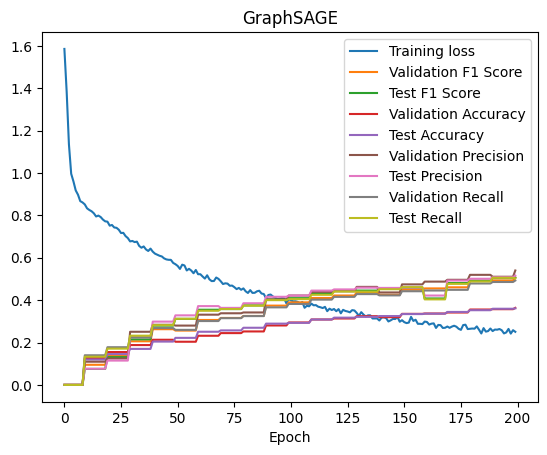

In [ ]:
import matplotlib.pyplot as plt

epochs_bar = trange(1, epochs + 1, desc='Loss n/a')

edge_index = pyg_graph.edge_index.to(device)
pos_train_edges = train_edges['edge'].to(device)

losses = []
valid_f1_list = []
test_f1_list = []
valid_acc_list = []
test_acc_list = []
valid_prec_list = []
test_prec_list = []
valid_rec_list = []
test_rec_list = []

for epoch in epochs_bar:
    loss = train(graphsage_model, link_predictor, initial_node_embeddings.weight, edge_index, pos_train_edges, optimizer, batch_size)
    losses.append(loss)

    epochs_bar.set_description(f'Loss {loss:0.4f}')

    if epoch % eval_steps == 0:
        valid_f1, valid_acc, valid_prec, valid_rec, test_f1, test_acc, test_prec, test_rec = test(graphsage_model, link_predictor, initial_node_embeddings.weight, edge_index, pos_valid_edges, neg_valid_edges, pos_test_edges, neg_test_edges, batch_size)
        print()
        print(f'Epoch: {epoch}')
        print(f'Validation F1 Score: {valid_f1:0.4f}, Validation Accuracy: {valid_acc:0.4f}, Validation Precision: {valid_prec:0.4f}, Validation Recall: {valid_rec:0.4f}')
        print(f'Test F1 Score: {test_f1:0.4f}, Test Accuracy: {test_acc:0.4f}, Test Precision: {test_prec:0.4f}, Test Recall: {test_rec:0.4f}')

        valid_f1_list.append(valid_f1)
        test_f1_list.append(test_f1)
        valid_acc_list.append(valid_acc)
        test_acc_list.append(test_acc)
        valid_prec_list.append(valid_prec)
        test_prec_list.append(test_prec)
        valid_rec_list.append(valid_rec)
        test_rec_list.append(test_rec)

    else:
        valid_f1_list.append(valid_f1_list[-1] if valid_f1_list else 0)
        test_f1_list.append(test_f1_list[-1] if test_f1_list else 0)
        valid_acc_list.append(valid_acc_list[-1] if valid_acc_list else 0)
        test_acc_list.append(test_acc_list[-1] if test_acc_list else 0)
        valid_prec_list.append(valid_prec_list[-1] if valid_prec_list else 0)
        test_prec_list.append(test_prec_list[-1] if test_prec_list else 0)
        valid_rec_list.append(valid_rec_list[-1] if valid_rec_list else 0)
        test_rec_list.append(test_rec_list[-1] if test_rec_list else 0)

plt.title("GraphSAGE")
plt.xlabel("Epoch")
plt.plot(losses, label="Training loss")
plt.plot(valid_f1_list, label="Validation F1 Score")
plt.plot(test_f1_list, label="Test F1 Score")
plt.plot(valid_acc_list, label="Validation Accuracy")
plt.plot(test_acc_list, label="Test Accuracy")
plt.plot(valid_prec_list, label="Validation Precision")
plt.plot(test_prec_list, label="Test Precision")
plt.plot(valid_rec_list, label="Validation Recall")
plt.plot(test_rec_list, label="Test Recall")
plt.legend()
plt.show()


##TRAIN-TEST, DODAVANJE POSITIVE I NEGATIVE EDGES

In [ ]:
from sklearn.model_selection import train_test_split

train_edges, test_edges = train_test_split(pyg_graph.edge_index.t().tolist(), test_size=0.2)
train_edges, valid_edges = train_test_split(train_edges, test_size = 0.1)

train_edges = torch.tensor(train_edges, dtype=torch.long)
test_edges = torch.tensor(test_edges, dtype=torch.long)
valid_edges = torch.tensor(valid_edges, dtype=torch.long)

In [ ]:
modified_rows = []

for row in train_edges:
    node1 = row[0].item()
    node2 = row[1].item()
    label = G.edges[node1, node2]['label']
    if label == 'partnership':
       modified_row = torch.cat((row, torch.tensor([1], dtype=torch.long)))
    elif label == 'customer':
       modified_row = torch.cat((row, torch.tensor([2], dtype=torch.long)))
    elif label == 'investment':
       modified_row = torch.cat((row, torch.tensor([3], dtype=torch.long)))
    elif label == 'supplier':
      modified_row = torch.cat((row, torch.tensor([4], dtype=torch.long)))
    elif label == 'competitor':
       modified_row = torch.cat((row, torch.tensor([5], dtype=torch.long)))
    elif label == 'nan':
       modified_row = torch.cat((row, torch.tensor([6], dtype=torch.long)))
    else:
       modified_row = torch.cat((row, torch.tensor([0], dtype=torch.long)))
    modified_rows.append(modified_row)

train_edges = torch.stack(modified_rows)


train_edges

tensor([[ 631,  196,    3],
        [ 425,  415,    1],
        [ 842,  843,    5],
        ...,
        [2105, 1091,    5],
        [ 507,  522,    1],
        [ 710,  711,    4]])

In [ ]:
modified_rows = []

for row in test_edges:
    node1 = row[0].item()
    node2 = row[1].item()
    label = G.edges[node1, node2]['label']
    if label == 'partnership':
       modified_row = torch.cat((row, torch.tensor([1], dtype=torch.long)))
    elif label == 'customer':
       modified_row = torch.cat((row, torch.tensor([2], dtype=torch.long)))
    elif label == 'investment':
       modified_row = torch.cat((row, torch.tensor([3], dtype=torch.long)))
    elif label == 'supplier':
      modified_row = torch.cat((row, torch.tensor([4], dtype=torch.long)))
    elif label == 'competitor':
       modified_row = torch.cat((row, torch.tensor([5], dtype=torch.long)))
    elif label == 'nan':
       modified_row = torch.cat((row, torch.tensor([6], dtype=torch.long)))
    else:
       modified_row = torch.cat((row, torch.tensor([0], dtype=torch.long)))
    modified_rows.append(modified_row)

test_edges = torch.stack(modified_rows)


test_edges

tensor([[ 955, 2257,    3],
        [1715, 1713,    1],
        [ 191,  192,    1],
        ...,
        [ 761,  759,    3],
        [ 739,  738,    1],
        [ 315,  327,    4]])

In [ ]:
modified_rows = []

for row in valid_edges:
    node1 = row[0].item()
    node2 = row[1].item()
    label = G.edges[node1, node2]['label']
    if label == 'partnership':
       modified_row = torch.cat((row, torch.tensor([1], dtype=torch.long)))
    elif label == 'customer':
       modified_row = torch.cat((row, torch.tensor([2], dtype=torch.long)))
    elif label == 'investment':
       modified_row = torch.cat((row, torch.tensor([3], dtype=torch.long)))
    elif label == 'supplier':
      modified_row = torch.cat((row, torch.tensor([4], dtype=torch.long)))
    elif label == 'competitor':
       modified_row = torch.cat((row, torch.tensor([5], dtype=torch.long)))
    elif label == 'nan':
       modified_row = torch.cat((row, torch.tensor([6], dtype=torch.long)))
    else:
       modified_row = torch.cat((row, torch.tensor([0], dtype=torch.long)))
    modified_rows.append(modified_row)

valid_edges = torch.stack(modified_rows)


valid_edges

tensor([[ 917,  892,    2],
        [  80,   75,    1],
        [ 321,  315,    2],
        [ 677,  736,    4],
        [ 648,   93,    3],
        [1883, 1882,    1],
        [ 809,  806,    1],
        [ 668,  416,    2],
        [1245,  426,    1],
        [ 112,  161,    1],
        [ 523,  507,    1],
        [ 827,  828,    4],
        [   7,    9,    3],
        [1940, 1939,    1],
        [ 682, 1452,    4],
        [ 776,  357,    4],
        [ 150,  112,    1],
        [   1,    0,    3],
        [ 836,  972,    2],
        [2066, 2067,    4],
        [1057, 1055,    1],
        [1286, 1494,    4],
        [ 172,  112,    1],
        [1682, 1681,    4],
        [1336, 1474,    4],
        [ 629,  628,    3],
        [   9, 1530,    2],
        [ 219,  237,    2],
        [ 156,  773,    1],
        [2006, 2005,    2],
        [ 704,  703,    5],
        [  92,   91,    5],
        [ 312,  414,    2],
        [  28,  480,    3],
        [ 715,  712,    1],
        [2135, 2134,

In [ ]:
pos_test_edges = test_edges
pos_valid_edges = valid_edges

In [ ]:
def generate_random_edge(num_nodes, train, test, valid):
    u = random.randint(0, num_nodes - 1)
    v = random.randint(0, num_nodes - 1)
    while u == v and (u, v) in train and (v, u) in train and (u, v) in test and (v, u) in test and (u, v) in valid and (v, u) in valid:  # Ensure u and v are distinct nodes
        v = random.randint(0, num_nodes - 1)
    return u, v

In [ ]:
import random
def generate_negative_edges(num_edges, num_nodes, train, test, valid):
    negative_edges = []
    while len(negative_edges) < num_edges:
        u = random.randint(0, num_nodes - 1)
        v = random.randint(0, num_nodes - 1)
        ran1, ran2 = generate_random_edge(num_nodes, train, test, valid)
        negative_edges.append([ran1, ran2, -1])
    return negative_edges

In [ ]:
num_test_positive_edges = len(test_edges)
neg_test_edges = generate_negative_edges(num_test_positive_edges, pyg_graph.num_nodes, train_edges, pos_test_edges, pos_valid_edges)
neg_test_edges = torch.tensor(neg_test_edges, dtype=torch.long)

In [ ]:
pos_test_edges

tensor([[ 955, 2257,    3],
        [1715, 1713,    1],
        [ 191,  192,    1],
        ...,
        [ 761,  759,    3],
        [ 739,  738,    1],
        [ 315,  327,    4]])

In [ ]:
neg_test_edges

tensor([[ 333, 1119,   -1],
        [1563, 2068,   -1],
        [1691, 1022,   -1],
        ...,
        [ 964, 1291,   -1],
        [ 972,  137,   -1],
        [ 665, 1850,   -1]])

In [ ]:
train_edges = {"edge":train_edges}

In [ ]:
test_edges = {"edge":pos_test_edges, "edge_neg":neg_test_edges}

In [ ]:
num_valid_positive_edges = len(pos_valid_edges)
neg_valid_edges = generate_negative_edges(num_valid_positive_edges, pyg_graph.num_nodes, train_edges, pos_test_edges, pos_valid_edges)
neg_valid_edges = torch.tensor(neg_valid_edges, dtype=torch.long)


In [ ]:
valid_edges = {"edge":pos_valid_edges, "edge_neg": neg_valid_edges}

In [ ]:
print(f'Number of training positive edges: {train_edges["edge"].shape[0]}')
print(f'Number of test positive edges: {test_edges["edge"].shape[0]}')
print(f'Number of test negative edges: {test_edges["edge_neg"].shape[0]}')
print(f'Number of valid positive edges: {valid_edges["edge"].shape[0]}')
print(f'Number of valid negative edges: {valid_edges["edge_neg"].shape[0]}')


Number of training positive edges: 2867
Number of test positive edges: 797
Number of test negative edges: 797
Number of valid positive edges: 319
Number of valid negative edges: 319


In [ ]:
torch.save(train_edges, '/content/drive/MyDrive/Proekt/train_edges_with_label.pth')
torch.save(test_edges, '/content/drive/MyDrive/Proekt/test_edges_with_label.pth')
torch.save(valid_edges, '/content/drive/MyDrive/Proekt/valid_edges_with_label.pth')

##REZULTATI

In [ ]:
##Multi-class with industry as node feature
			                GraphSAGE	    GCN		    GAT		    SGC
Loss			            0.2506		    0.4272		0.5427		0.4974
Validation F1 Score	  0.5063		    0.3943		0.3537		0.3950
Validation Accuracy	  0.3636		    0.2947		0.2665		0.2962
Validation Precision	0.5400		    0.4761		0.4024		0.4000
Validation Recall	    0.4927		    0.3872		0.3446		0.3991
Test F1 Score		      0.5069		    0.4246		0.3728		0.4063
Test Accuracy		      0.3614		    0.3043		0.2691		0.2923
Test Precision		    0.5159		    0.4530		0.3916		0.4075
Test Recall		        0.5028		    0.4181		0.3685		0.4129